In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
import pickle

In [ ]:
# paths for data
train_dataset_path = '/content/drive/MyDrive/dataset/digit/train.csv'
test_dataset_path = '/content/drive/MyDrive/dataset/digit/test.csv'

In [ ]:
# Check if the train dataset path exists
train_path_exists = os.path.exists(train_dataset_path)
print(f"Train dataset path exists: {train_path_exists}")

# Check if the test dataset path exists
test_path_exists = os.path.exists(test_dataset_path)
print(f"Test dataset path exists: {test_path_exists}")

Train dataset path exists: False
Test dataset path exists: False


In [ ]:
# Load and prepare the data
train_data = pd.read_csv('/content/drive/MyDrive/dataset/digit/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/dataset/digit/test.csv')

# Split training data into features and labels
X = train_data.iloc[:, 1:].values.astype('float32')  # All pixel values
y = train_data.iloc[:, 0].values.astype('int64')     # Labels (digits)

# Normalize the data (pixel values range from 0 to 255)
X = X / 255.0

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Method 01 - Using Random Forest Classifier

In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
clf.fit(X_train, y_train)

# Make predictions on the training set (to evaluate training performance)
train_preds = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Make predictions on the test set
test_preds = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 1.0000
Test Accuracy: 0.9630


In [ ]:
print("First few test labels: ", y_test[:10])
print("First few predictions: ", test_preds[:10])


First few test labels:  [8 1 9 9 8 6 2 2 7 1]
First few predictions:  [8 1 9 9 8 6 2 2 7 1]


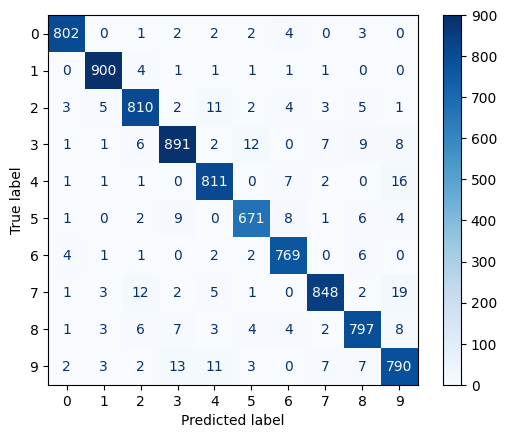

In [ ]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, test_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10)).plot(cmap='Blues')
plt.show()

 Method 02 - Using Fully Connected Network

In [ ]:
#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [ ]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [ ]:
# Create datasets and data loaders
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

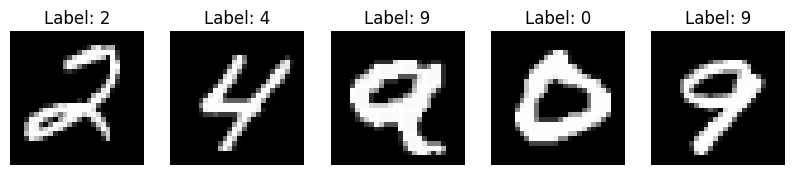

In [ ]:
# Exploratory Data Analysis (EDA)

#visualize some sample random images
def plot_sample_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        index = np.random.randint(0, len(dataset))
        image, label = dataset[index]
        image = image.numpy().reshape(28, 28)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

plot_sample_images(train_dataset)

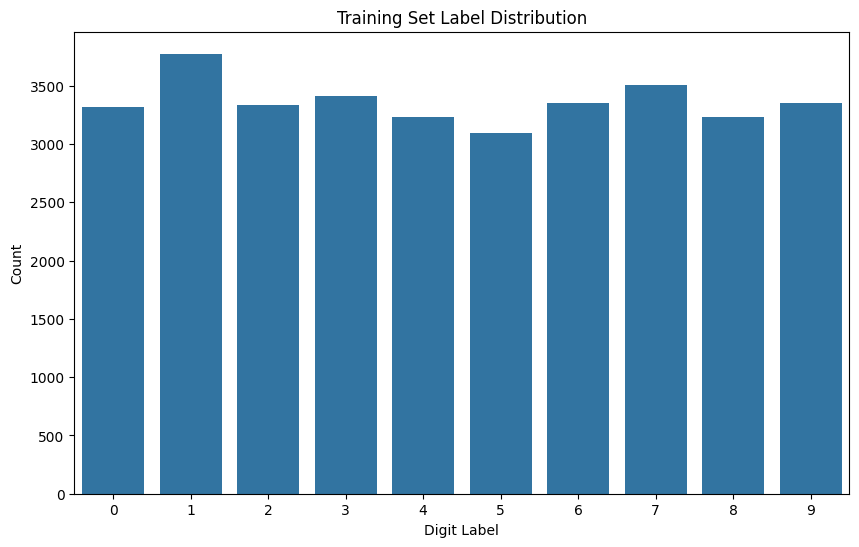

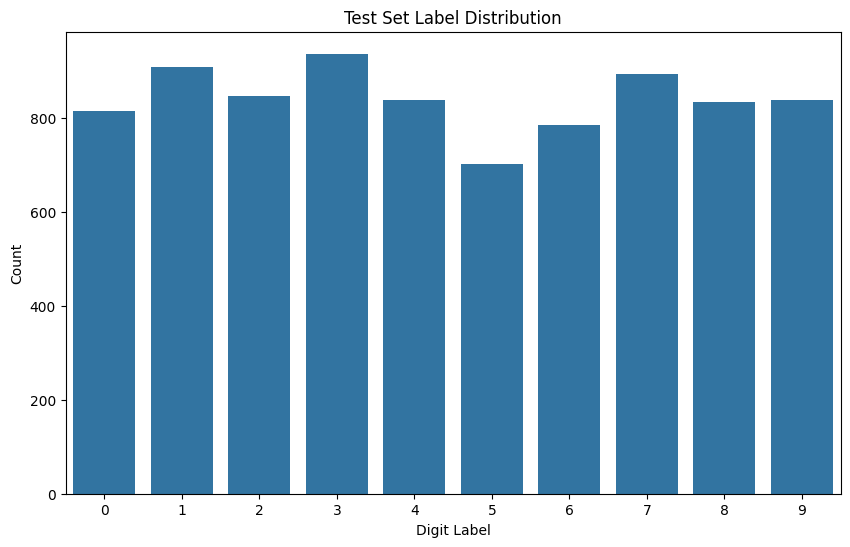

Unique labels in the training set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in the test set: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
def plot_label_distribution(labels, dataset_type="Training"):
    # Convert PyTorch tensor to numpy array
    labels_np = labels.numpy().astype(int)

    # Create a Pandas DataFrame for easier plotting
    labels_df = pd.DataFrame(labels_np, columns=['label'])

    # Plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.countplot(data=labels_df, x='label')
    plt.title(f'{dataset_type} Set Label Distribution')
    plt.xlabel('Digit Label')
    plt.ylabel('Count')
    plt.xticks(range(10), range(10))  # Ensure x-axis has labels from 0 to 9
    plt.show()

# Plot label distribution for training set
plot_label_distribution(y_train, "Training")

# Plot label distribution for test set
plot_label_distribution(y_test, "Test")

# Optional: Verify unique labels in the datasets
print("Unique labels in the training set:", np.unique(y_train.numpy()))
print("Unique labels in the test set:", np.unique(y_test.numpy()))

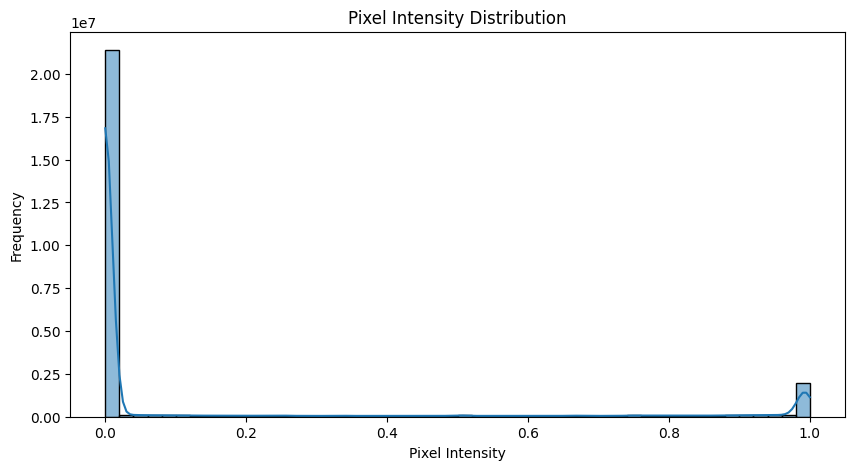

In [ ]:
# Pixel Intensity Distribution
def plot_pixel_intensity_distribution(images):
    plt.figure(figsize=(10, 5))
    sns.histplot(images.numpy().flatten(), bins=50, kde=True)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_pixel_intensity_distribution(X_train)

In [ ]:
# Define the neural network model
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input based on actual size

        # calling first layer
        x = F.relu(self.fc1(x))

        # calling second layer
        x = F.relu(self.fc2(x))

        #calling third layer
        x = F.relu(self.fc3(x))

        #calling second layer
        x = self.fc4(x)
        return x


# Create an instance of the model
model = FullyConnectedNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the model
num_epochs = 20
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Compute the average loss and accuracy over the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')


Epoch [1/20], Loss: 0.3326, Accuracy: 90.0744
Epoch [2/20], Loss: 0.1224, Accuracy: 96.2411
Epoch [3/20], Loss: 0.0772, Accuracy: 97.5327
Epoch [4/20], Loss: 0.0564, Accuracy: 98.1964
Epoch [5/20], Loss: 0.0450, Accuracy: 98.5952
Epoch [6/20], Loss: 0.0354, Accuracy: 98.8601
Epoch [7/20], Loss: 0.0275, Accuracy: 99.1101
Epoch [8/20], Loss: 0.0209, Accuracy: 99.3125
Epoch [9/20], Loss: 0.0244, Accuracy: 99.2202
Epoch [10/20], Loss: 0.0216, Accuracy: 99.2589
Epoch [11/20], Loss: 0.0189, Accuracy: 99.4256
Epoch [12/20], Loss: 0.0146, Accuracy: 99.5060
Epoch [13/20], Loss: 0.0130, Accuracy: 99.5982
Epoch [14/20], Loss: 0.0166, Accuracy: 99.4702
Epoch [15/20], Loss: 0.0120, Accuracy: 99.6786
Epoch [16/20], Loss: 0.0103, Accuracy: 99.6667
Epoch [17/20], Loss: 0.0176, Accuracy: 99.4940
Epoch [18/20], Loss: 0.0096, Accuracy: 99.7113
Epoch [19/20], Loss: 0.0089, Accuracy: 99.7530
Epoch [20/20], Loss: 0.0130, Accuracy: 99.6369


In [ ]:
# Evaluate the model on the test dataset
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)  # Calculate the loss
        test_loss += loss.item()  # Accumulate the test loss

        _, predicted = torch.max(outputs.data, 1)


        # Accumulate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

   # Compute the average test loss
    test_loss = test_loss / len(test_loader)

    # Calculate test accuracy
    test_accuracy = 100 * correct / total

    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.2f}%')

    # Check the number of predictions
print(f"Total number of predictions: {len(all_preds)}")


Test Loss: 0.1153
Test Accuracy: 97.79%
Total number of predictions: 8400


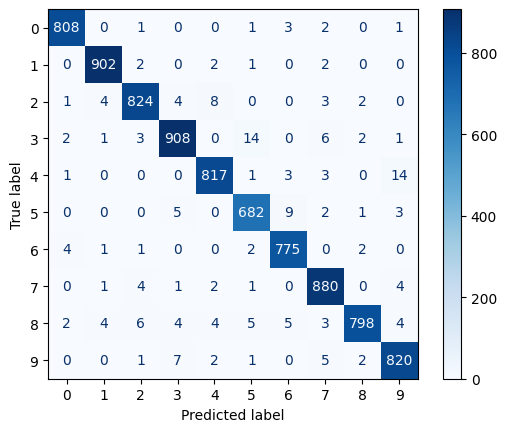

In [ ]:
# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

Compare Both Accuracy

In [ ]:
# View accuracy

# Test Accuracy on the test set in RandomForestClassifier on the test dataset
test_preds = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f'Test Accuracy Random Forest Classifier: {test_accuracy:.4f}')

# Test Accuracy on the test set in FullyConnected Network on the test dataset
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Accumulate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    test_accuracy = correct / total
    print(f'Test Accuracy Fully Connected Network: {test_accuracy:.4f}')


Test Accuracy Random Forest Classifier: 0.9630
Test Accuracy Fully Connected Network: 0.9779


In [ ]:
# Save the trained model and other data
model_data = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'train_accuracies': train_accuracies
}


In [ ]:
# Path to save the pickle file
file_path = '/content/drive/MyDrive/dataset/digit/fullconnectedNN.pkl'

# Save the classifier to the pickle file
with open(file_path, 'wb') as file:
    pickle.dump(model_data, file)

In [ ]:
# Load the test data
test_data = pd.read_csv('/content/drive/MyDrive/dataset/digit/test.csv')

# Check the shape of the test data
print("Test data shape:", test_data.shape)

# Separate features
X_test_full = test_data.iloc[:, 1:].values.astype('float32') / 255.0  # Normalize

# Check the shape of the normalized data
print("Shape of X_test_full:", X_test_full.shape)

# Check if columns are correct
expected_columns = 784
if X_test_full.shape[1] < expected_columns:
    # Padding with zeros if the number of columns is less than expected
    padding = expected_columns - X_test_full.shape[1]
    X_test_full = np.pad(X_test_full, ((0, 0), (0, padding)), mode='constant')
    print("Padding applied. New shape:", X_test_full.shape)


Test data shape: (28000, 784)
Shape of X_test_full: (28000, 783)
Padding applied. New shape: (28000, 784)


In [ ]:
# Convert to PyTorch tensor and reshape
X_test_full_tensor = torch.tensor(X_test_full).view(-1, 28*28)

# Make predictions on the full test dataset
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test_full_tensor)
    _, final_predictions = torch.max(outputs.data, 1)

# Convert predictions to a DataFrame
predictions = pd.DataFrame(final_predictions.numpy(), columns=['Label'])

# Ensure the number of predictions is exactly 28,000
assert len(predictions) == 28000, f"Expected 28,000 predictions, but got {len(predictions)}."

# Add an 'ImageId' column that auto-increments starting from 1
predictions['ImageId'] = range(1, len(predictions) + 1)

# Reorder columns to have 'ImageId' first
predictions = predictions[['ImageId', 'Label']]

# Save the predictions to a new CSV file
predictions.to_csv('/content/drive/MyDrive/dataset/digit/predictions.csv', index=False)
